In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import timedelta

import folium
from folium.plugins import HeatMap
from folium import plugins
import seaborn as sns

In [3]:
df = pd.read_csv('./data/crime.csv')

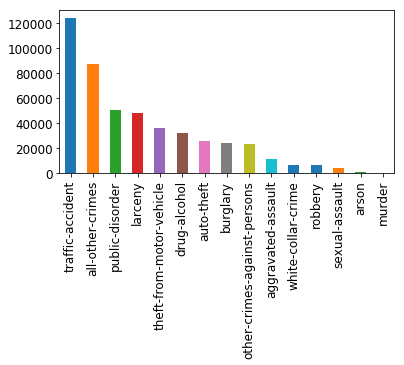

In [4]:
f = plt.figure(figsize=(6,3))

crime_cnts = df[['OFFENSE_CATEGORY_ID','OFFENSE_ID']].groupby(['OFFENSE_CATEGORY_ID'],as_index=False).count().nlargest(15,['OFFENSE_ID'])

# Plot the most common crimes

df.OFFENSE_CATEGORY_ID.value_counts().plot(kind='bar', fontsize=12,legend=False)
plt.show()
f.savefig("foo.png", bbox_inches='tight', dpi=300)

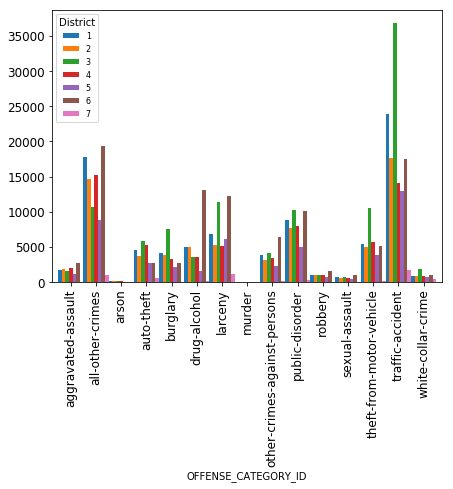

In [5]:
#f = plt.figure(figsize=(6,3))
f_save = {}
f1, ax = plt.subplots(figsize=(7,5))

df.groupby('OFFENSE_CATEGORY_ID').DISTRICT_ID.value_counts().sort_index().unstack().plot(kind='bar',  ax=ax,fontsize=12,width=1)
ax.legend(title='District', fontsize=8)


f1.savefig("./figure/f2.png", bbox_inches='tight', dpi=300)

2019-05-02 06:29:00
2019-05-02 06:29:00
Year     2014    2015    2016    2017    2018    2019
Month                                                
1      5874.0  7255.0  7561.0  7565.0  7676.0  7457.0
2      5682.0  6122.0  7040.0  6780.0  6814.0  6453.0
3      6689.0  7030.0  7409.0  7639.0  7486.0  7033.0
4      6706.0  7461.0  7753.0  7494.0  7857.0  6926.0
5      7204.0  7609.0  8037.0  8153.0  8442.0   190.0


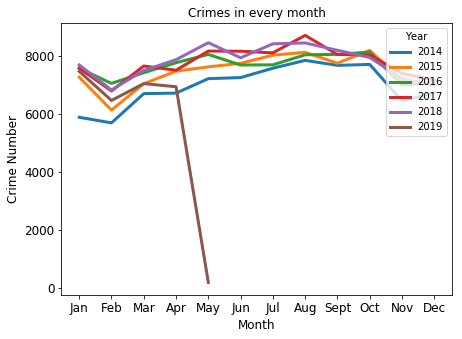

In [7]:
df['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'], errors='coerce')
old = df['FIRST_OCCURRENCE_DATE'].min()
new = df['FIRST_OCCURRENCE_DATE'].max()
print(new)

m = df.FIRST_OCCURRENCE_DATE.dt.year == 2020
df[~m].FIRST_OCCURRENCE_DATE.max()
print(df[~m].FIRST_OCCURRENCE_DATE.max())

f3, ax = plt.subplots(figsize=(7,5))
title = 'Crimes in every month'

df_ym = df[~m].groupby([df.FIRST_OCCURRENCE_DATE.dt.year,
                                             df.FIRST_OCCURRENCE_DATE.dt.month]
                                           ).INCIDENT_ID.count().unstack(0)
df_ym.rename_axis('Year', axis='columns',inplace=True)
df_ym.index.rename('Month', inplace=True)
print(df_ym.head())

df_ym.plot(xticks=range(1,13),fontsize=12, ax=ax, linewidth=3)
ax.set_title(title)


ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Crime Number',fontsize=12)
ax.legend(loc='upper right',title='Year',fontsize=10)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'))

f3.savefig("./figure/f3.png", bbox_inches='tight', dpi=300)




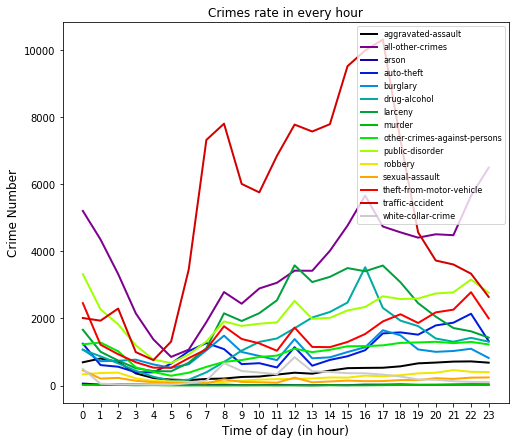

In [218]:
f4, ax = plt.subplots(figsize=(8,7))
title = 'Crimes rate in every hour'

t = df[~m].groupby(['OFFENSE_CATEGORY_ID',
                                    df[~m].FIRST_OCCURRENCE_DATE.dt.hour]
                                  ).INCIDENT_ID.count().unstack(0)
t.index.rename('Hour', inplace=True)

t.plot(ax=ax,cmap='nipy_spectral',title=title,fontsize=10,linewidth=2,xticks=range(24))


ax.legend(loc='upper right',fontsize=8)
ax.set_xlabel('Time of day (in hour)',fontsize=12)
ax.set_ylabel('Crime Number',fontsize=12)

f4.savefig("./figure/f4.png", bbox_inches='tight', dpi=600)

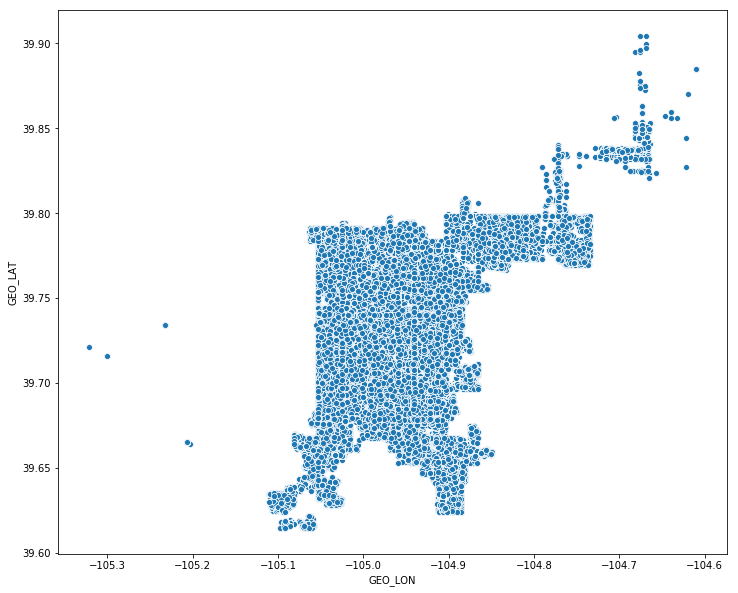

In [197]:
df = df[(df['GEO_LON'] < -50) & (df['GEO_LAT'] > 38)]

plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='GEO_LON',y='GEO_LAT', data=df)
plt.show()




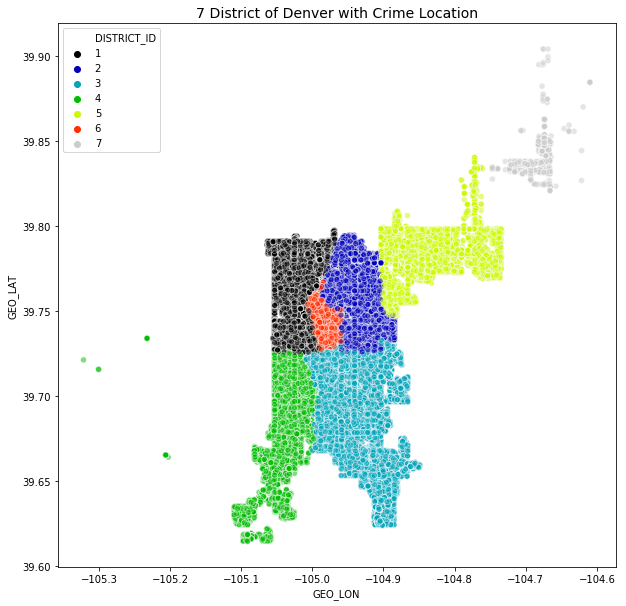

In [202]:
## district separation ##
f5 = plt.figure(figsize=(10,10))

sns.scatterplot(x='GEO_LON',
                y='GEO_LAT',
                alpha=0.5,
                hue='DISTRICT_ID',
                palette=plt.get_cmap('nipy_spectral'),
                legend='full',
                
                data=df)
plt.title('7 District of Denver with Crime Location', fontsize=14)
f5.savefig("./figure/f5.png", bbox_inches='tight', dpi=300)



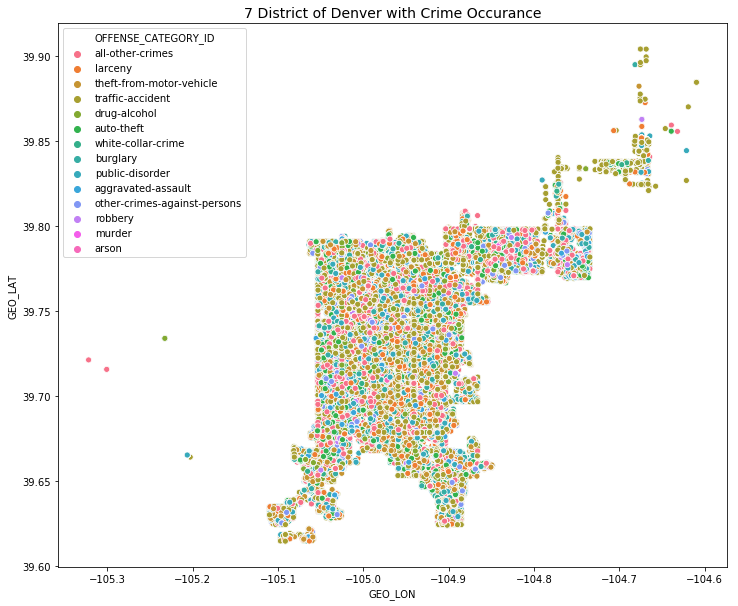

In [207]:
f6 = plt.figure(figsize=(12,10))
offense_cats = df['OFFENSE_CATEGORY_ID'].value_counts()[:14].index


sns.scatterplot(x='GEO_LON',
                y='GEO_LAT',
                hue='OFFENSE_CATEGORY_ID',
                data=df[df['OFFENSE_CATEGORY_ID'].isin(offense_cats)])
plt.title('7 District of Denver with Crime Occurance', fontsize=14)
f6.savefig("./figure/f6.png", bbox_inches='tight', dpi=300)



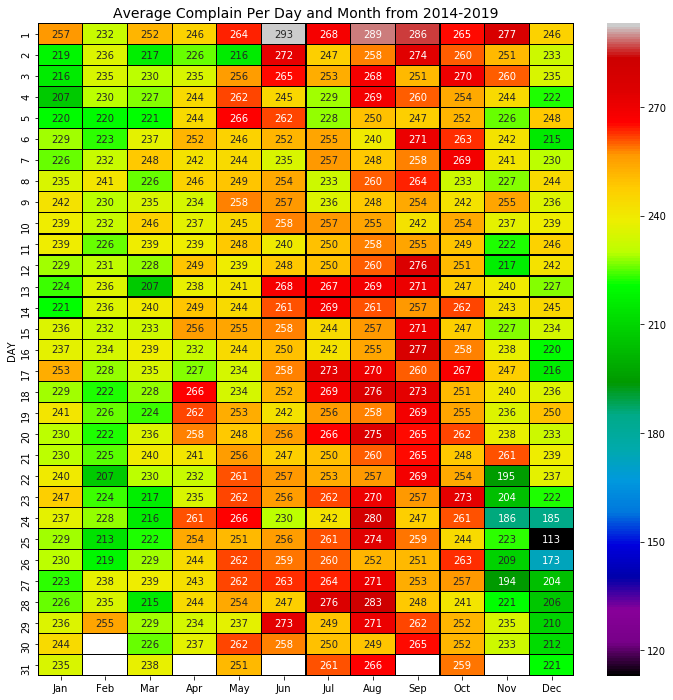

In [265]:
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.FIRST_OCCURRENCE_DATE = pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df["YEAR"] = df.FIRST_OCCURRENCE_DATE.dt.year
df["DAY"] = df.FIRST_OCCURRENCE_DATE.dt.day
df["MONTH"] = df.FIRST_OCCURRENCE_DATE.dt.month
df["HOUR"] = df.FIRST_OCCURRENCE_DATE.dt.hour
df.index = pd.DatetimeIndex(df["FIRST_OCCURRENCE_DATE"])
c_pt = df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=len)
c_pt_year = df.pivot_table(values='YEAR', index='DAY', columns='MONTH', aggfunc=lambda x: len(x.unique()))
c_avg = c_pt / c_pt_year
c_avg.columns = m
f7 = plt.figure(figsize=(12,12))
plt.title('Average Complain Per Day and Month from 2014-2019', fontsize=14)
sns.heatmap(crimes_avg.round(), cmap='nipy_spectral', linecolor='black',linewidths=0.2, cbar=True, annot=True, fmt=".0f")
f7.savefig("./figure/f7.png", bbox_inches='tight', dpi=300)

In [266]:
import folium
df.FIRST_OCCURRENCE_DATE = pd.to_datetime(df.FIRST_OCCURRENCE_DATE)
df["YEAR"] = df.FIRST_OCCURRENCE_DATE.dt.year
crimes_df = df[df.IS_CRIME==1]
crimes_df = df.dropna(subset=['GEO_LAT', 'GEO_LON'])
robbery_df = df[(df.OFFENSE_CATEGORY_ID=='robbery') & (df["YEAR"]==2014)]
print (robbery_df.head())
denver_map = folium.Map(location=[39.72378, -104.899157],
                       zoom_start=8,
                       tiles="Stamen Toner")
for i in range(len(robbery_df)):
    lat = robbery_df.iloc[i]['GEO_LAT']
    long = robbery_df.iloc[i]['GEO_LON']
    popup_text = """Neighborhood: {}<br>
                    Date Occurred: {}<br>""".format(crimes_df.iloc[i]['NEIGHBORHOOD_ID'],
                                               crimes_df.iloc[i]['FIRST_OCCURRENCE_DATE'])
    folium.CircleMarker(location=[lat, long], popup=popup_text, radius=8, color='blue', fill=True).add_to(denver_map)
denver_map


                       INCIDENT_ID        OFFENSE_ID  OFFENSE_CODE  \
FIRST_OCCURRENCE_DATE                                                
2014-03-04 01:00:00     2014110744  2014110744120800          1208   
2014-03-11 20:40:00     2014125601  2014125601120200          1202   
2014-03-11 02:00:00     2014124343  2014124343120800          1208   
2014-03-04 19:15:00     2014112274  2014112274120500          1205   
2014-03-04 10:20:00     2014111353  2014111353120800          1208   

                       OFFENSE_CODE_EXTENSION    OFFENSE_TYPE_ID  \
FIRST_OCCURRENCE_DATE                                              
2014-03-04 01:00:00                         0  robbery-residence   
2014-03-11 20:40:00                         0   robbery-business   
2014-03-11 02:00:00                         0  robbery-residence   
2014-03-04 19:15:00                         0     robbery-street   
2014-03-04 10:20:00                         0  robbery-residence   

                      OFFENSE_CA

c:\users\aminu\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


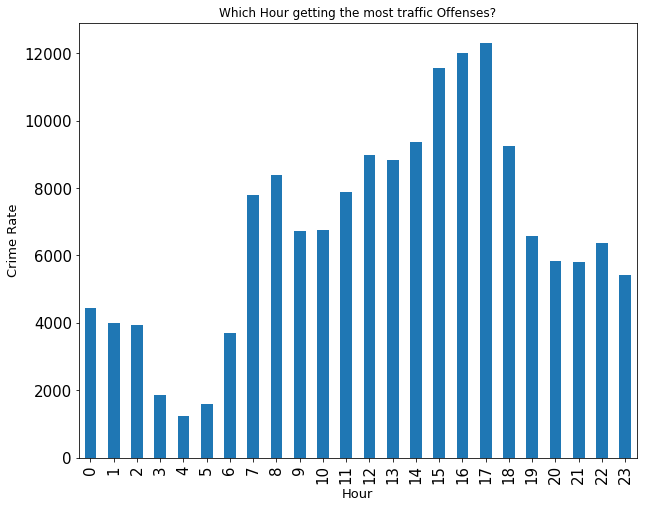

In [264]:
# Which hours of the day are getting the most traffic crimes
# Group all traffic crimes into a data set
#print(df['OFFENSE_TYPE_ID'].str[:4])
f8, ax = plt.subplots(figsize=(10,8))
t = df[df['OFFENSE_TYPE_ID'].str[:4] == 'traf']
t['HOUR'] = pd.DatetimeIndex(t['FIRST_OCCURRENCE_DATE']).hour

t_h = t[['OFFENSE_TYPE_ID','HOUR']].groupby(['HOUR'],as_index=False).count()
ax = t_h.plot(kind='bar', x='HOUR',ax=ax, title ="Which Hour getting the most traffic Offenses?",  fontsize=15,legend=False,)
ax.set_xlabel("Hour", fontsize=13)
ax.set_ylabel("Crime Rate", fontsize=13)
f8.savefig("./figure/f8.png", bbox_inches='tight', dpi=300)